# Venn Diagram of sig DMGs from pairwise comparisons

I'm going to exclude the comparisons of just phase 1 and just phase 2, and just focus on the other comparisons made

These include: 
- HH vs. HC
- CC vs. CH
- HH vs. CH
- CC vs. HC
- HH vs. CC
- HC vs. CH

In [2]:
library(tidyverse)
library(ggvenn)

In [3]:
# importing csv to df

# 1. control control vs. control hypoxic
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_CH.csv')

# 2. control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

# 3. control control vs. hypoxic hypoxic
CC_HH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HH.csv')

# 4. control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

# 5. hypoxic hypoxic vs. control hypoxic
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_CH.csv')

# 6. hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


In [8]:
# pulling out only significant DMGs

# 1. control control vs. control hypoxic
sig_CC_CH <- filter(CC_CH, CC_CH$padj < 0.05)
dim(sig_CC_CH) # 1 sig DMG

# 2. control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 sig DMGs

# 3. control control vs. hypoxic hypoxic
sig_CC_HH <- filter(CC_HH, CC_HH$padj < 0.05)
dim(sig_CC_HH) # 2 sig DMGs

# 4. control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 sig DMGs

# 5. hypoxic hypoxic vs. control hypoxic
sig_HH_CH <- filter(HH_CH, HH_CH$padj < 0.05)
dim(sig_HH_CH) # 0 sig DMGs

# 6. hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 sig DMGs



[1] 1 7

[1] 20  7

[1] 2 7

[1] 258   7

[1] 0 7

[1] 124   7

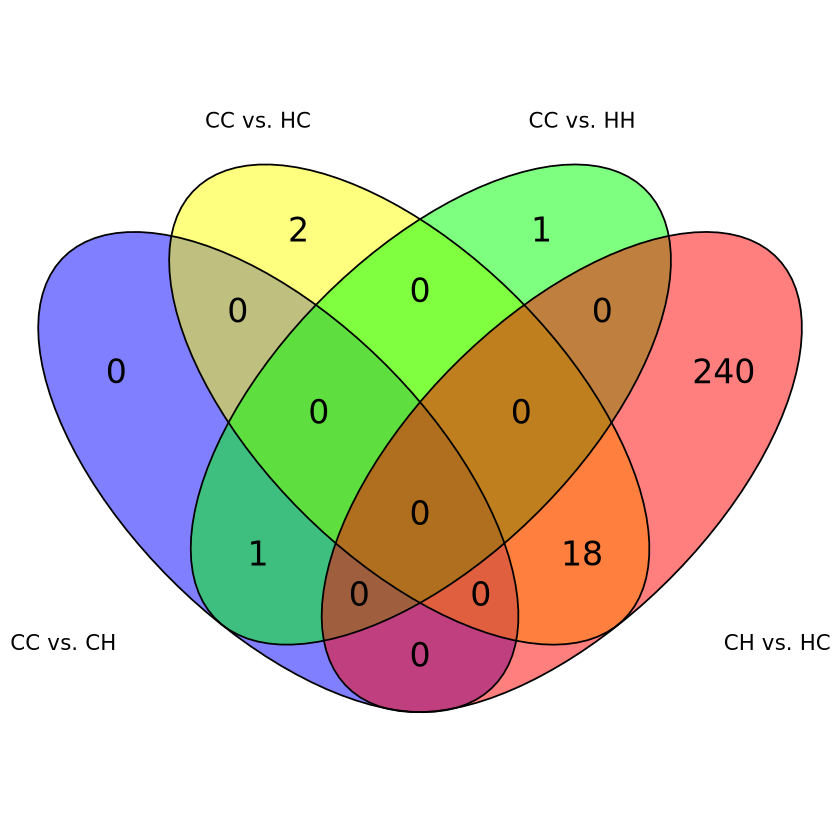

In [11]:
x = list(A = sig_CC_CH$X,
         B = sig_CC_HC$X, 
         C = sig_CC_HH$X,
        D = sig_CH_HC$X,
        E = sig_HH_CH$X,
        F = sig_HH_HC$X)

names(x) <- c('CC vs. CH',
              'CC vs. HC',
              'CC vs. HH',
             'CH vs. HC',
             'HH vs. CH',
             'HH vs. HC')

ggvenn(x,
      set_name_size = 4.5,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = FALSE)